In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [11]:
# Definitions

base_dir = './output'

images_dir = './images'

pointnet_data = pd.read_csv(os.path.join(base_dir, 'pointnet_test_metrics.csv'))
pointnetpp_data = pd.read_csv(os.path.join(base_dir, 'pointnetpp_test_metrics.csv'))

class_names = ['Car', 'Pedestrian', 'Cyclist']

headings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'memory_usage', 'memory_usage_std', 'memory_usage_single', 'memory_usage_single_std', 'inference_time', 'inference_time_std', 'inference_time_single', 'inference_time_single_std', 'num_samples', 'num_classes', 'model_memory_usage', 'Car_precision', 'Car_recall', 'Car_f1', 'Pedestrian_precision', 'Pedestrian_recall', 'Pedestrian_f1', 'Cyclist_precision', 'Cyclist_recall', 'Cyclist_f1', 'model']

headings_labels = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 score (Macro)', 'Precision (Weighted)', 'Recall (Weighted)', 'F1 score (Weighted)', 'Memory usage', 'Memory usage std', 'Memory usage per object', 'Memory usage std per object', 'Inference time', 'Inference time std', 'Inference time per object', 'Inference time std per object', 'Num. samples', 'Num. classes', 'Model memory usage', 'Car precision', 'Car Recall', 'Car F1', 'Pedestrian precision', 'Pedestrian Recall', 'Pedestrian F1', 'Cyclist precision', 'Cyclist Recall', 'Cyclist F1', 'Model name']

assert len(headings) == len(headings_labels), "Headings and labels must have the same length"

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [12]:
if not os.path.exists(images_dir):

	os.system("mkdir -p " + images_dir)

else :

	files = os.listdir(images_dir)

	for file in files:

		if 'confusion_matrix' not in file:

			os.remove(os.path.join(images_dir, file))

In [13]:
pointnet_data = pd.read_csv(os.path.join(base_dir, 'pointnet_test_metrics.csv'))
pointnetpp_data = pd.read_csv(os.path.join(base_dir, 'pointnetpp_test_metrics.csv'))
pointpillars_data = pd.read_csv(os.path.join(base_dir, 'pointpillars_test_metrics.csv'))
pointrcnn_data = pd.read_csv(os.path.join(base_dir, 'point-rcnn_test_metrics.csv'))

pointnet_data['model'] = 'PointNet'
pointnetpp_data['model'] = 'PointNet++'
pointpillars_data['model'] = 'PointPillars'
pointrcnn_data['model'] = 'PointRCNN'

data = pd.concat([pointnet_data, pointnetpp_data, pointpillars_data, pointrcnn_data], axis=0)


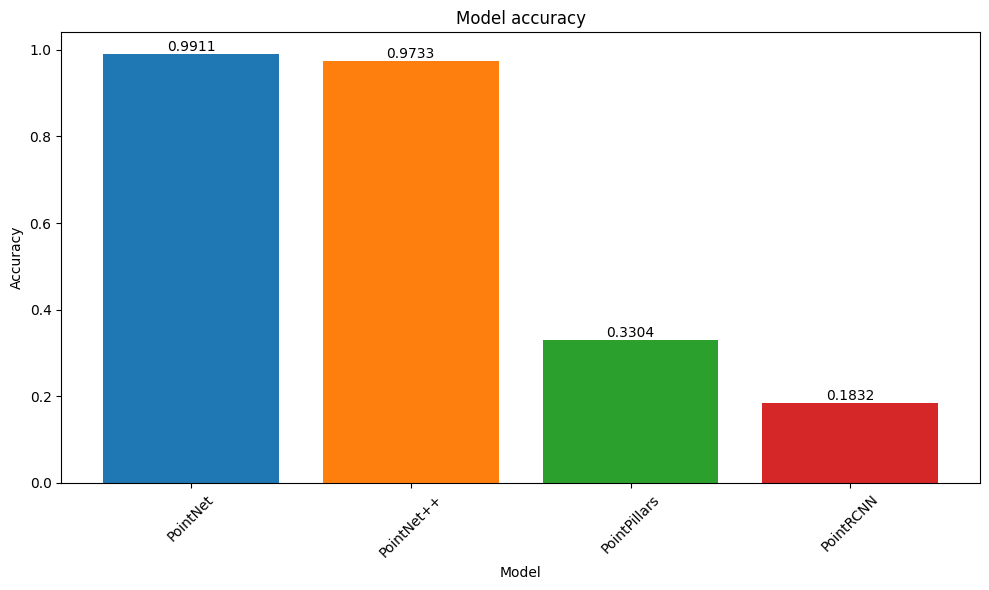

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(data['model'], data['accuracy'], color=colors[:len(data['model'])])

for bar in bars:

	height = bar.get_height()

	ax.text(
		bar.get_x() + bar.get_width() / 2,
		height,
		f'{height:.4f}',
		ha='center',
		va='bottom'
	)

plt.title('Model accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'accuracy.png'))
plt.show()


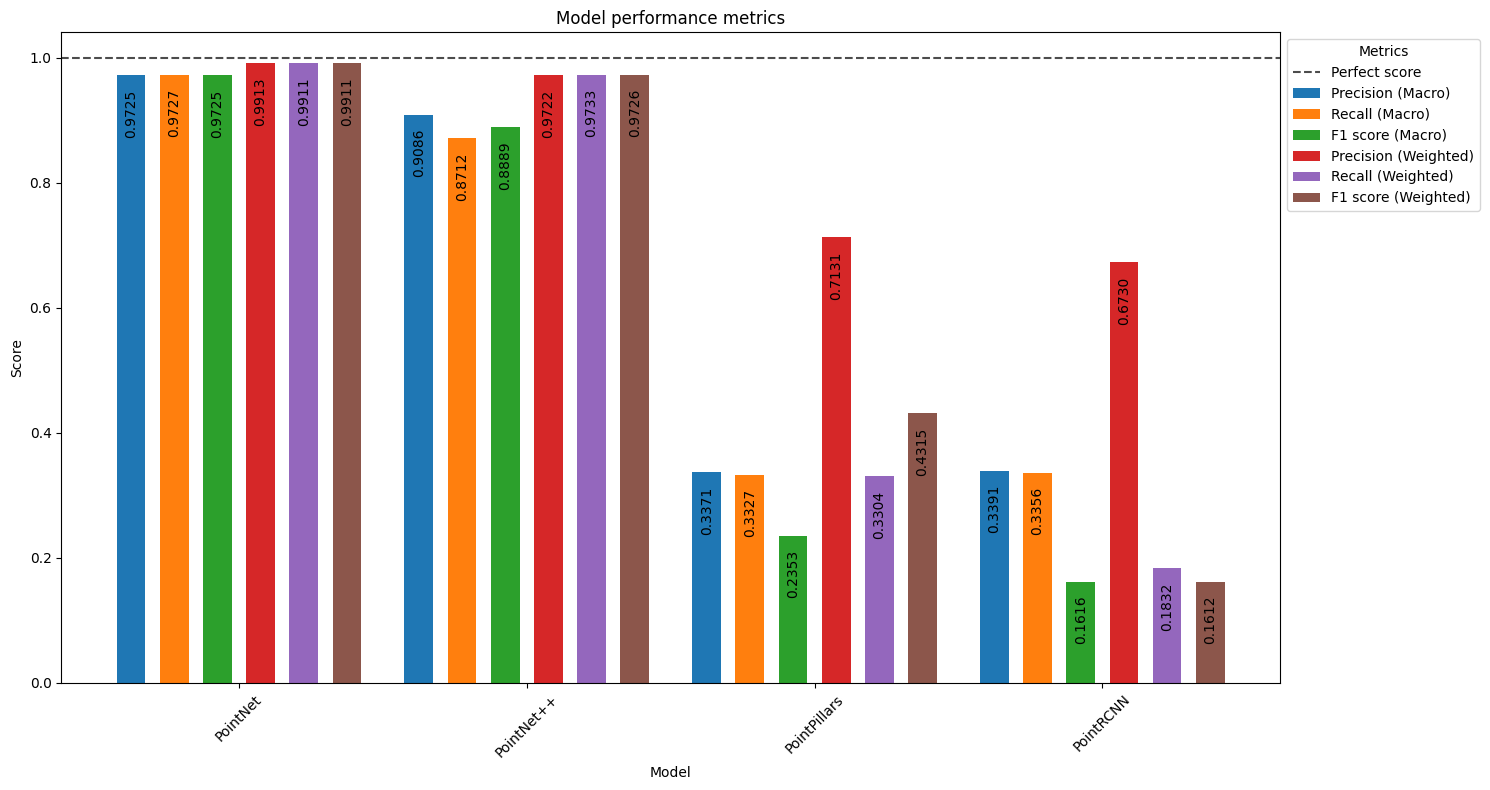

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))

metrics = ['precision_macro', 'recall_macro', 'f1_macro', 'precision_weighted', 'recall_weighted', 'f1_weighted']
n_metrics = len(metrics)
bar_width = 0.1
bar_spacing = 0.05
group_width = n_metrics * (bar_width + bar_spacing)

models = data['model'].unique()
n_models = len(models)

x = np.arange(n_models)

for i, metric in enumerate(metrics):

	metric_values = [data[data['model'] == model][metric].values[0] for model in models]

	bars = ax.bar(x + i * (bar_width + bar_spacing), metric_values, width=bar_width, label=headings_labels[i + 1])

	for j, bar in enumerate(bars):

		height = bar.get_height()

		ax.text(
			bar.get_x() + bar.get_width() / 2,
			height - 0.1,
			f'{height:.4f}',
			ha='center',
			va='bottom',
			rotation=90,
		)

ax.axhline(y=1.0, color='black', linestyle='--', alpha=0.7, label='Perfect score')

plt.title('Model performance metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(x + (n_metrics - 1) * (bar_width + bar_spacing) / 2, models, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metrics')
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'model_performance_metrics.png'))

plt.show()

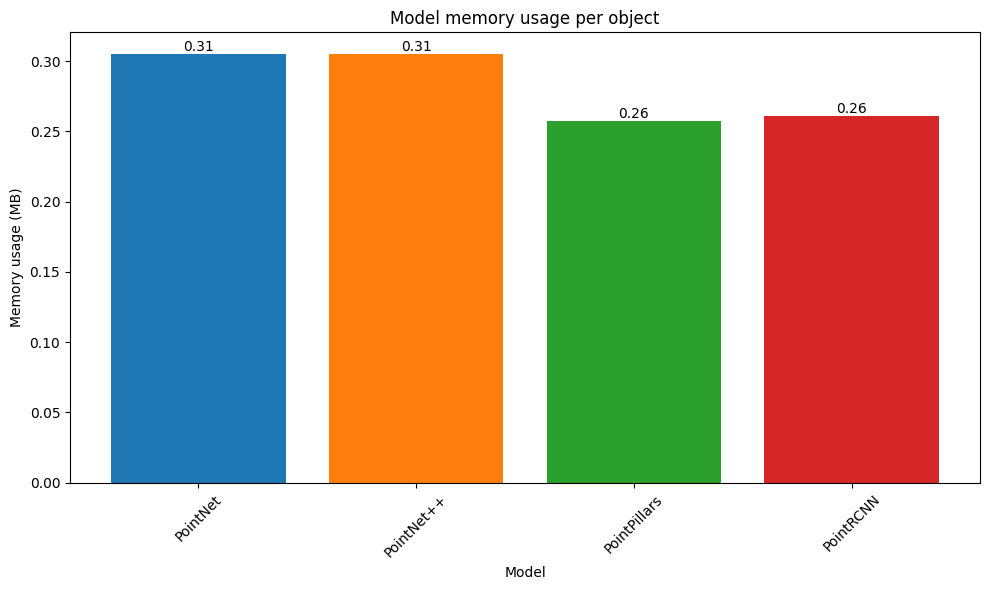

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(data['model'], data['memory_usage_single'], color=colors[:len(data['model'])])

for bar in bars:

	height = bar.get_height()

	ax.text(
		bar.get_x() + bar.get_width() / 2,
		height,
		f'{height:.2f}',
		ha='center',
		va='bottom'
	)

plt.title('Model memory usage per object')
plt.xlabel('Model')
plt.ylabel('Memory usage (MB)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'memory_usage.png'))

plt.show()

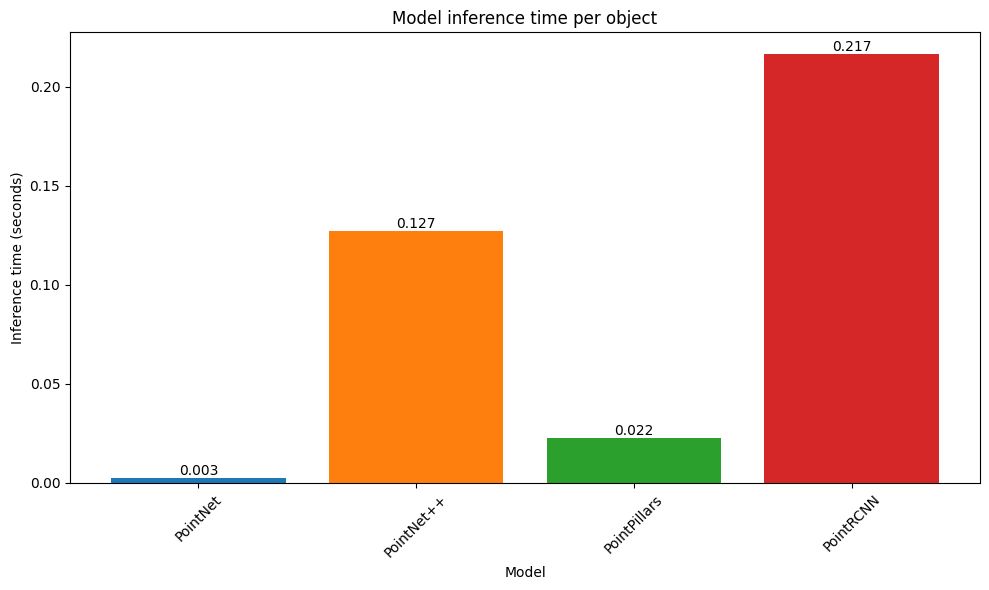

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = plt.bar(data['model'], data['inference_time_single'], color=colors[:len(data['model'])])

for bar in bars:

	height = bar.get_height()

	ax.text(
		bar.get_x() + bar.get_width() / 2,
		height,
		f'{height:.3f}',
		ha='center',
		va='bottom'
	)

plt.title('Model inference time per object')
plt.xlabel('Model')
plt.ylabel('Inference time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'inference_time.png'))

plt.show()

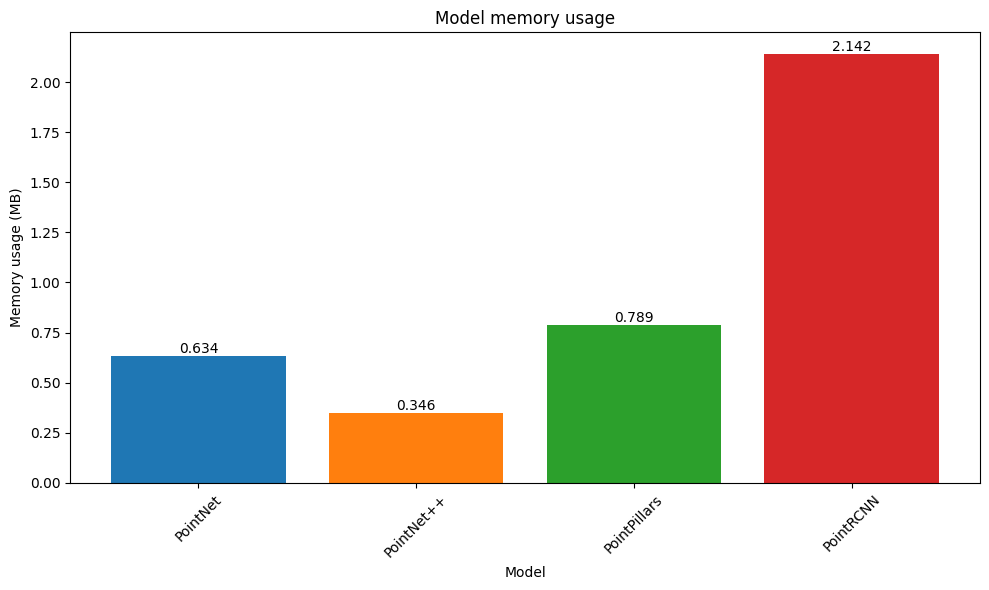

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

bars = plt.bar(data['model'], data['model_memory_usage'], color=colors[:len(data['model'])])

for bar in bars:

	height = bar.get_height()

	ax.text(
		bar.get_x() + bar.get_width() / 2,
		height,
		f'{height:.3f}',
		ha='center',
		va='bottom'
	)

plt.title('Model memory usage')
plt.xlabel('Model')
plt.ylabel('Memory usage (MB)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'model_memory_usage.png'))

plt.show()